<h1>Импорт библиотек

In [3]:
import numpy as np
import matplotlib.pyplot as plt

<h1>Задача 1. Дан набор из $p$ матриц размерностью $(n, n)$ и $p$ векторов размерностью $(n, 1)$, найти сумму произведений матриц на векторы. Написать тесты для кода

In [10]:
import numpy as np

def sum_prod(X, V):
    '''
    X - список матриц (n, n)
    V - список векторов (n, 1)
    Гарантируется, что len(X) == len(V)
    '''
    # Инициализируем сумму нулевым вектором того же размера, что и векторы V
    result = np.zeros_like(V[0])
    
    # Проходим по всем парам (матрица, вектор)
    for i in range(len(X)):
        result += np.dot(X[i], V[i])
    
    return result

def test_sum_prod():
    # Тест 1: два вектора и две матрицы
    X1 = np.array([[1, 2], [3, 4]])
    V1 = np.array([[1], [0]])
    
    X2 = np.array([[2, 0], [0, 2]])
    V2 = np.array([[0], [1]])
    
    # Ожидаемый результат: сумма двух векторов [[1], [3]] + [[0], [2]] = [[1], [5]]
    expected = np.array([[1], [5]])
    result = sum_prod([X1, X2], [V1, V2])
    assert np.allclose(result, expected), f"Test 1 failed: {result}"
    
    # Тест 2: один вектор и одна матрица
    X1 = np.array([[1, 0], [0, 1]])
    V1 = np.array([[1], [2]])
    
    expected = np.array([[1], [2]])
    result = sum_prod([X1], [V1])
    assert np.allclose(result, expected), f"Test 2 failed: {result}"
    
    # Тест 3: нулевые матрицы и векторы
    X1 = np.array([[0, 0], [0, 0]])
    V1 = np.array([[0], [0]])
    
    X2 = np.array([[0, 0], [0, 0]])
    V2 = np.array([[0], [0]])
    
    expected = np.array([[0], [0]])
    result = sum_prod([X1, X2], [V1, V2])
    assert np.allclose(result, expected), f"Test 3 failed: {result}"
    
    # Тест 4: отрицательные числа
    X1 = np.array([[1, -1], [-1, 1]])
    V1 = np.array([[2], [-3]])
    
    X2 = np.array([[0, 1], [1, 0]])
    V2 = np.array([[-1], [1]])
    
    expected = np.array([[6], [-6]])
    result = sum_prod([X1, X2], [V1, V2])
    assert np.allclose(result, expected), f"Test 4 failed: {result}"
    
    print("All tests passed!")
    
# Запуск тестов
test_sum_prod()


All tests passed!


<h1>Задача 2. Дана матрица M, напишите функцию, которая бинаризует матрицу по некоторому threshold (то есть, все значения большие threshold становятся равными 1, иначе 0). Напишите тесты для кода

In [11]:
import numpy as np

def binarize(M, threshold=0.5):
    '''
    Бинаризует матрицу M по порогу threshold.
    
    M - исходная матрица (numpy array)
    threshold - порог бинаризации (по умолчанию 0.5)
    '''
    # Используем векторизированную операцию сравнения для бинаризации
    return (M > threshold).astype(int)

def test_binarize():
    # Тест 1: Матрица со значениями от 0 до 1, порог 0.5
    M = np.array([[0.1, 0.6], [0.3, 0.9]])
    expected = np.array([[0, 1], [0, 1]])
    result = binarize(M, threshold=0.5)
    assert np.array_equal(result, expected), f"Test 1 failed: {result}"
    
    # Тест 2: Все значения меньше порога
    M = np.array([[0.1, 0.2], [0.3, 0.4]])
    expected = np.array([[0, 0], [0, 0]])
    result = binarize(M, threshold=0.5)
    assert np.array_equal(result, expected), f"Test 2 failed: {result}"
    
    # Тест 3: Все значения больше порога
    M = np.array([[0.6, 0.7], [0.8, 0.9]])
    expected = np.array([[1, 1], [1, 1]])
    result = binarize(M, threshold=0.5)
    assert np.array_equal(result, expected), f"Test 3 failed: {result}"
    
    # Тест 4: Порог 0.3
    M = np.array([[0.1, 0.3], [0.4, 0.9]])
    expected = np.array([[0, 0], [1, 1]])
    result = binarize(M, threshold=0.3)
    assert np.array_equal(result, expected), f"Test 4 failed: {result}"
    
    # Тест 5: Негативные значения
    M = np.array([[-0.1, -0.6], [0.3, -0.9]])
    expected = np.array([[0, 0], [1, 0]])
    result = binarize(M, threshold=0)
    assert np.array_equal(result, expected), f"Test 5 failed: {result}"
    
    print("All tests passed!")
    
# Запуск тестов
test_binarize()


All tests passed!


<h1>Задача 3. Напишите функцию, которая возвращает уникальные элементы из каждой строки матрицы. Напишите такую же функцию, но для столбцов. Напишите тесты для кода

In [12]:
import numpy as np

def unique_rows(mat):
    '''
    Возвращает список уникальных элементов для каждой строки матрицы mat.
    
    mat - матрица (numpy array)
    '''
    # Используем list comprehension для обхода каждой строки
    return [np.unique(row) for row in mat]

def unique_columns(mat):
    '''
    Возвращает список уникальных элементов для каждого столбца матрицы mat.
    
    mat - матрица (numpy array)
    '''
    # Транспонируем матрицу, чтобы работать со столбцами как со строками
    return [np.unique(mat[:, col]) for col in range(mat.shape[1])]

def test_unique_rows_columns():
    # Тест 1: Уникальные элементы в строках
    mat = np.array([[1, 2, 2, 3], [4, 4, 5, 5], [6, 6, 6, 6]])
    expected_rows = [np.array([1, 2, 3]), np.array([4, 5]), np.array([6])]
    result_rows = unique_rows(mat)
    for i in range(len(expected_rows)):
        assert np.array_equal(result_rows[i], expected_rows[i]), f"Test 1, row {i} failed: {result_rows[i]}"
    
    # Тест 2: Уникальные элементы в столбцах
    expected_columns = [np.array([1, 4, 6]), np.array([2, 4, 6]), np.array([2, 5, 6]), np.array([3, 5, 6])]
    result_columns = unique_columns(mat)
    for i in range(len(expected_columns)):
        assert np.array_equal(result_columns[i], expected_columns[i]), f"Test 2, column {i} failed: {result_columns[i]}"
    
    # Тест 3: Матрица с одинаковыми строками
    mat = np.array([[1, 1, 1], [1, 1, 1], [1, 1, 1]])
    expected_rows = [np.array([1]), np.array([1]), np.array([1])]
    result_rows = unique_rows(mat)
    for i in range(len(expected_rows)):
        assert np.array_equal(result_rows[i], expected_rows[i]), f"Test 3, row {i} failed: {result_rows[i]}"
    
    # Тест 4: Матрица с одинаковыми столбцами
    expected_columns = [np.array([1]), np.array([1]), np.array([1])]
    result_columns = unique_columns(mat)
    for i in range(len(expected_columns)):
        assert np.array_equal(result_columns[i], expected_columns[i]), f"Test 4, column {i} failed: {result_columns[i]}"
    
    print("All tests passed!")
    
# Запуск тестов
test_unique_rows_columns()


All tests passed!


<h1>Задача 4. Напишите функцию, которая заполняет матрицу с размерами $(m, n)$ случайными числами, распределенными по нормальному закону. Затем считает мат. ожидание и дисперсию для каждого из столбцов и строк, а также строит для каждой строки и столбца гистограмму значений (использовать функцию hist из модуля matplotlib.plot)

Математическое ожидание для каждой строки: [ 0.06265685 -0.85420389 -0.37523251 -0.17964573  0.42465156]
Дисперсия для каждой строки: [0.26054991 0.47769225 0.49433547 1.0333583  0.47163389]
Математическое ожидание для каждого столбца: [ 0.11235958 -0.08496572 -0.41523354 -0.3495793 ]
Дисперсия для каждого столбца: [0.30332926 1.12184618 0.14679178 1.17321312]


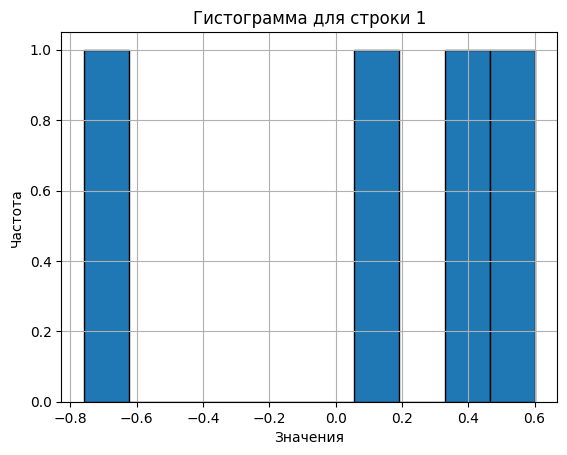

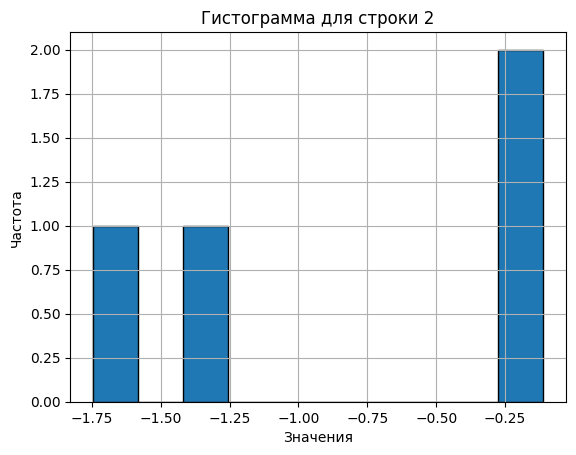

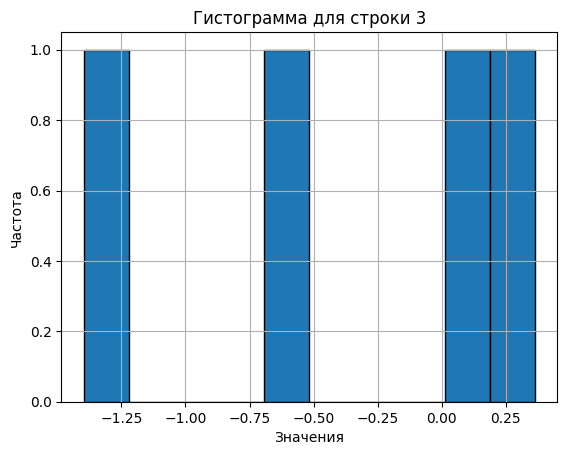

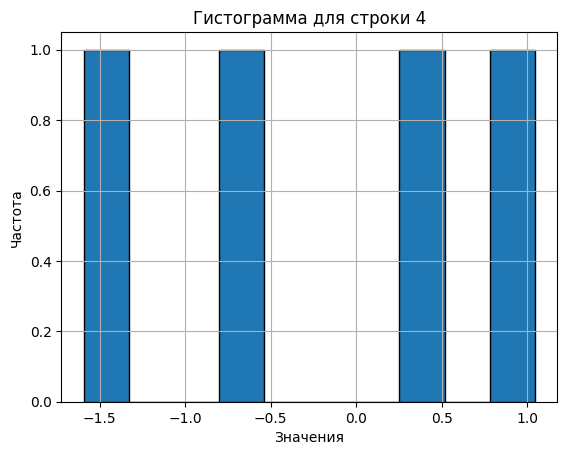

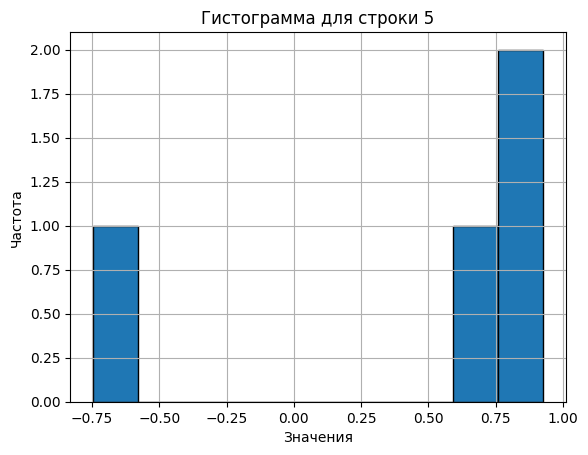

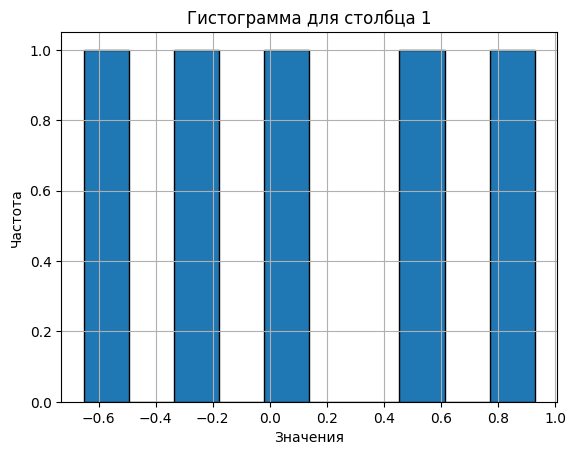

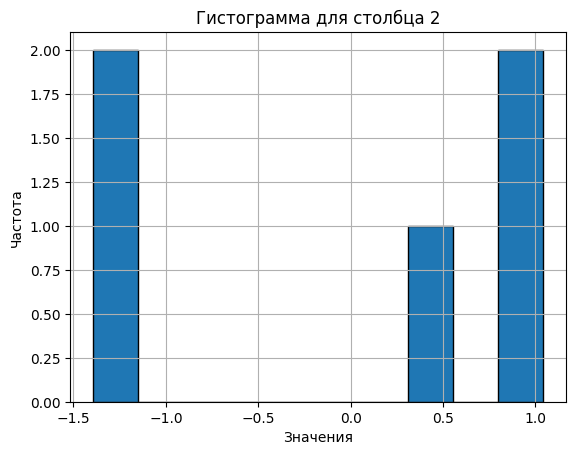

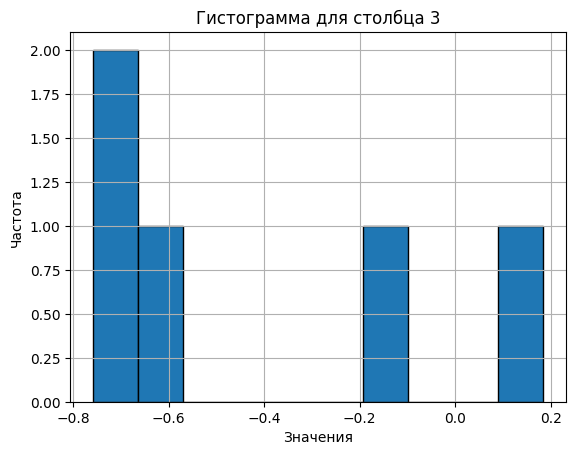

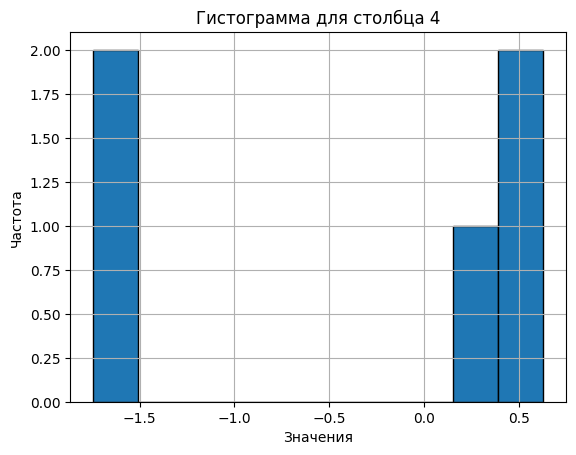

Математическое ожидание для каждой строки: [ 0.10407594 -0.2312646  -0.1966403  -0.49829906 -0.89449028]
Дисперсия для каждой строки: [1.15204204 0.46834684 0.69860857 0.27215937 0.76759177]
Математическое ожидание для каждого столбца: [-0.48932564 -0.73630064 -0.43146637  0.28379801]
Дисперсия для каждого столбца: [0.5102222  0.32486042 1.25297485 0.47177651]


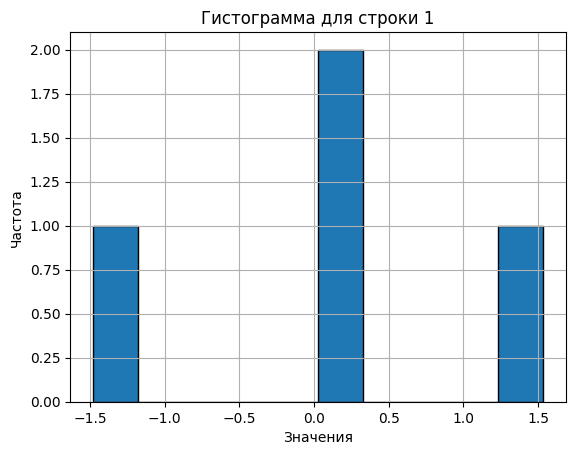

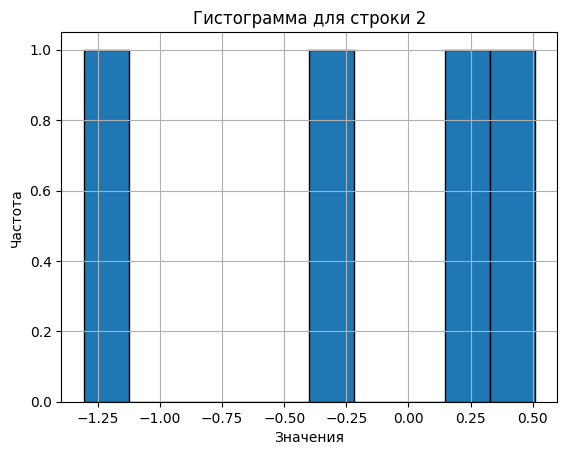

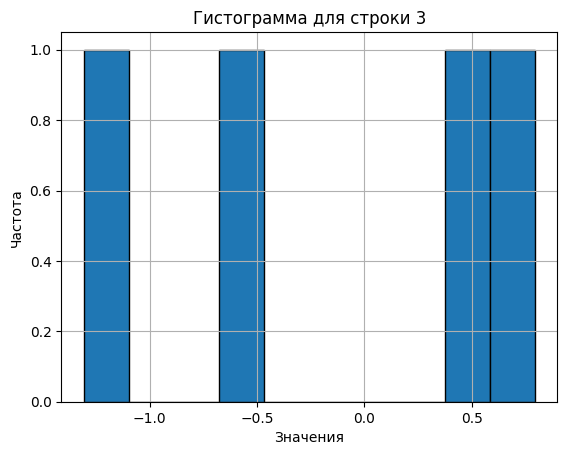

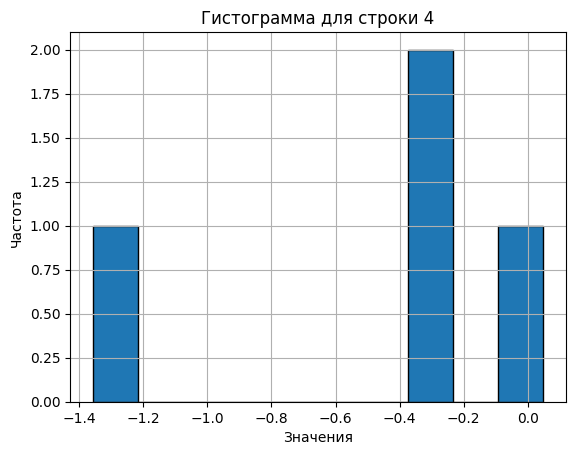

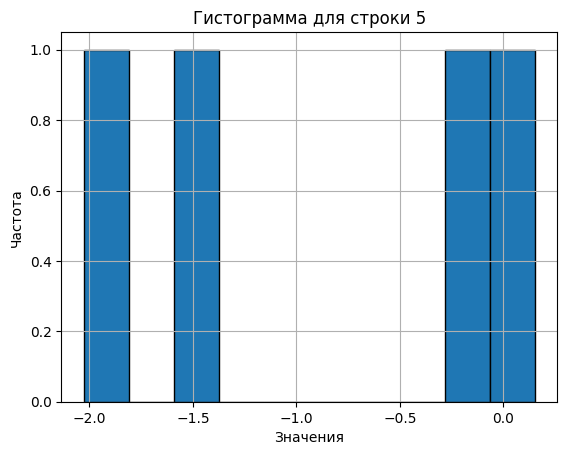

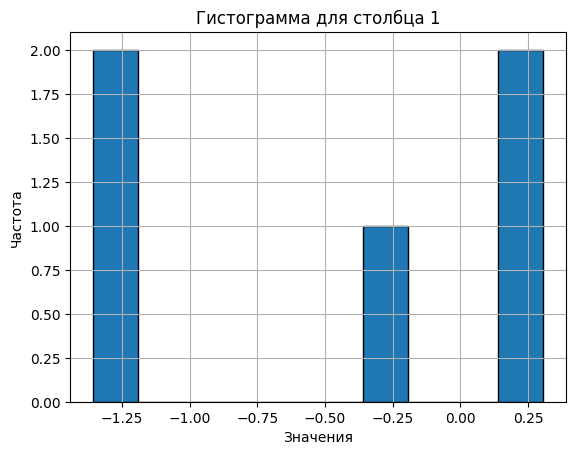

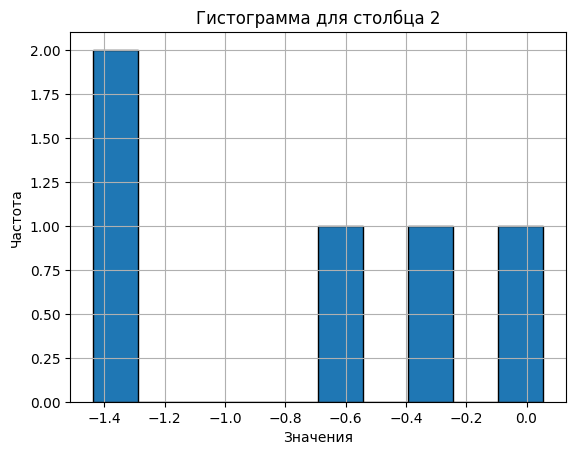

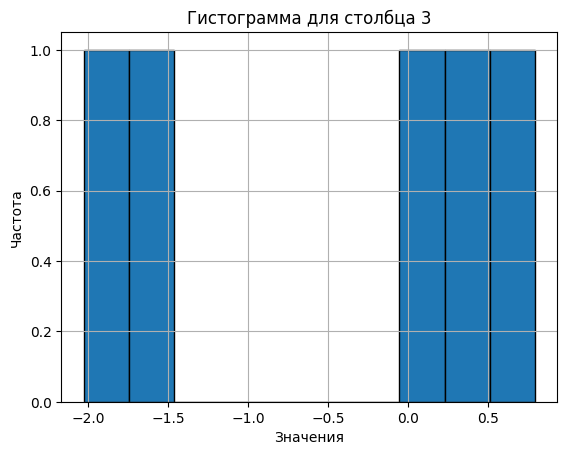

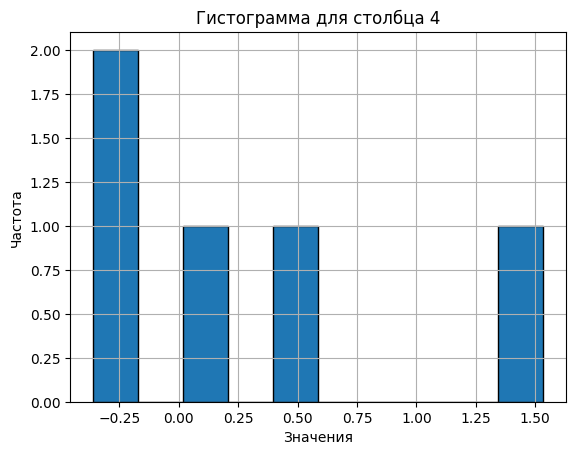

In [13]:
import numpy as np
import matplotlib.pyplot as plt

def generate_matrix(m, n):
    '''
    Создает матрицу размером (m, n), заполненную случайными числами, распределенными по нормальному закону.
    
    m - количество строк
    n - количество столбцов
    '''
    # Генерация матрицы случайных чисел с нормальным распределением
    matrix = np.random.randn(m, n)
    return matrix

def calculate_statistics(matrix):
    '''
    Вычисляет математическое ожидание и дисперсию для каждой строки и столбца.
    
    matrix - матрица (numpy array)
    '''
    # Математическое ожидание и дисперсия по строкам
    row_means = np.mean(matrix, axis=1)
    row_vars = np.var(matrix, axis=1)
    
    # Математическое ожидание и дисперсия по столбцам
    col_means = np.mean(matrix, axis=0)
    col_vars = np.var(matrix, axis=0)
    
    return row_means, row_vars, col_means, col_vars

def plot_histograms(matrix):
    '''
    Строит гистограммы значений для каждой строки и каждого столбца матрицы.
    
    matrix - матрица (numpy array)
    '''
    m, n = matrix.shape
    
    # Гистограммы для каждой строки
    for i in range(m):
        plt.figure()
        plt.hist(matrix[i, :], bins=10, edgecolor='black')
        plt.title(f'Гистограмма для строки {i + 1}')
        plt.xlabel('Значения')
        plt.ylabel('Частота')
        plt.grid(True)
        plt.show()
    
    # Гистограммы для каждого столбца
    for j in range(n):
        plt.figure()
        plt.hist(matrix[:, j], bins=10, edgecolor='black')
        plt.title(f'Гистограмма для столбца {j + 1}')
        plt.xlabel('Значения')
        plt.ylabel('Частота')
        plt.grid(True)
        plt.show()

# Основная функция, которая выполняет все шаги
def main(m, n):
    # Генерация матрицы
    matrix = generate_matrix(m, n)
    
    # Вычисление статистик
    row_means, row_vars, col_means, col_vars = calculate_statistics(matrix)
    
    # Вывод статистик
    print("Математическое ожидание для каждой строки:", row_means)
    print("Дисперсия для каждой строки:", row_vars)
    print("Математическое ожидание для каждого столбца:", col_means)
    print("Дисперсия для каждого столбца:", col_vars)
    
    # Построение гистограмм
    plot_histograms(matrix)

# Запуск
main(5, 4)  # Пример для матрицы 5x4

main(5, 4)  # Пример для матрицы 5x4


<h1>Задача 5. Напишите функцию, которая заполняет матрицу $(m, n)$ в шахматном порядке заданными числами $a$ и $b$. Напишите тесты для кода

In [14]:
import numpy as np

def chess(m, n, a, b):
    '''
    Создает матрицу размера (m, n), заполненную числами a и b в шахматном порядке.
    
    m - количество строк
    n - количество столбцов
    a - значение для "белых" клеток (начиная с [0, 0])
    b - значение для "черных" клеток (начиная с [0, 1])
    '''
    # Инициализируем пустую матрицу
    matrix = np.zeros((m, n), dtype=int)
    
    # Заполняем матрицу в шахматном порядке
    for i in range(m):
        for j in range(n):
            if (i + j) % 2 == 0:
                matrix[i, j] = a
            else:
                matrix[i, j] = b
    
    return matrix

def test_chess():
    # Тест 1: Матрица 3x3, числа 1 и 2
    m, n, a, b = 3, 3, 1, 2
    expected = np.array([[1, 2, 1],
                         [2, 1, 2],
                         [1, 2, 1]])
    result = chess(m, n, a, b)
    assert np.array_equal(result, expected), f"Test 1 failed: {result}"
    
    # Тест 2: Матрица 2x2, числа 5 и 10
    m, n, a, b = 2, 2, 5, 10
    expected = np.array([[5, 10],
                         [10, 5]])
    result = chess(m, n, a, b)
    assert np.array_equal(result, expected), f"Test 2 failed: {result}"
    
    # Тест 3: Матрица 4x3, числа -1 и 0
    m, n, a, b = 4, 3, -1, 0
    expected = np.array([[-1, 0, -1],
                         [0, -1, 0],
                         [-1, 0, -1],
                         [0, -1, 0]])
    result = chess(m, n, a, b)
    assert np.array_equal(result, expected), f"Test 3 failed: {result}"
    
    # Тест 4: Матрица 1x4, числа 7 и 3
    m, n, a, b = 1, 4, 7, 3
    expected = np.array([[7, 3, 7, 3]])
    result = chess(m, n, a, b)
    assert np.array_equal(result, expected), f"Test 4 failed: {result}"
    
    # Тест 5: Матрица 4x1, числа 1 и 9
    m, n, a, b = 4, 1, 1, 9
    expected = np.array([[1],
                         [9],
                         [1],
                         [9]])
    result = chess(m, n, a, b)
    assert np.array_equal(result, expected), f"Test 5 failed: {result}"
    
    print("All tests passed!")
    
# Запуск тестов
test_chess()


All tests passed!


<h1>Задача 6. Напишите функцию, которая отрисовывает прямоугольник с заданными размерами (a, b) на изображении размера (m, n), цвет фона задайте в схеме RGB, как и цвет прямоугольника. Цвета также должны быть параметрами функции. Напишите аналогичную функцию но для овала с полуосями a и b. Напишите тесты для кода.
Примечание: уравнение эллипса (границы овала) можно записать как:
<h1>$\frac{(x-x_0)^2}{a^2}+\frac{(y-y_0)^2}{b^2}=1$

In [16]:
from PIL import Image, ImageDraw

def draw_rectangle(a, b, m, n, rectangle_color, background_color):
    '''
    Рисует прямоугольник размером (a, b) на изображении размером (m, n).
    
    a - ширина прямоугольника
    b - высота прямоугольника
    m - ширина изображения
    n - высота изображения
    rectangle_color - цвет прямоугольника в формате RGB (tuple из 3 значений)
    background_color - цвет фона в формате RGB (tuple из 3 значений)
    '''
    # Создаем изображение с заданным фоном
    img = Image.new('RGB', (m, n), background_color)
    draw = ImageDraw.Draw(img)
    
    # Вычисляем координаты прямоугольника (по центру изображения)
    top_left = ((m - a) // 2, (n - b) // 2)
    bottom_right = (top_left[0] + a, top_left[1] + b)
    
    # Рисуем прямоугольник
    draw.rectangle([top_left, bottom_right], fill=rectangle_color)
    
    return img

def draw_ellipse(a, b, m, n, ellipse_color, background_color):
    '''
    Рисует овал с полуосями a и b на изображении размером (m, n).
    
    a - полуось по горизонтали
    b - полуось по вертикали
    m - ширина изображения
    n - высота изображения
    ellipse_color - цвет овала в формате RGB (tuple из 3 значений)
    background_color - цвет фона в формате RGB (tuple из 3 значений)
    '''
    # Создаем изображение с заданным фоном
    img = Image.new('RGB', (m, n), background_color)
    draw = ImageDraw.Draw(img)
    
    # Вычисляем координаты для рисования овала (по центру изображения)
    top_left = ((m - 2 * a) // 2, (n - 2 * b) // 2)
    bottom_right = (top_left[0] + 2 * a, top_left[1] + 2 * b)
    
    # Рисуем эллипс (овал)
    draw.ellipse([top_left, bottom_right], fill=ellipse_color)
    
    return img

def test_draw_rectangle():
    # Тест 1: Прямоугольник 100x200 на изображении 400x400, синий и белый цвета
    img = draw_rectangle(100, 200, 400, 400, (0, 0, 255), (255, 255, 255))
    img.show()  # Показывает изображение

def test_draw_ellipse():
    # Тест 1: Овал с полуосями 100 и 50 на изображении 400x400, красный и белый цвета
    img = draw_ellipse(100, 50, 400, 400, (255, 0, 0), (255, 255, 255))
    img.show()  # Показывает изображение

# Запуск тестов
test_draw_rectangle()
test_draw_ellipse()



<h1>Задача 7. Дан некий временной ряд. Для данного ряда нужно найти его: математическое ожидание, дисперсию, СКО, найти все локальные максимумы и минимумы (локальный максимум - это точка, которая больше своих соседних точек, а локальный минимум - это точка, которая меньше своих соседей), а также вычислить для данного ряда другой ряд, получаемый методом скользящего среднего с размером окна $p$.
<h1>Примечание: метод скользящего среднего подразумевает нахождение среднего из подмножетсва ряда размером $p$

In [17]:
import numpy as np
from scipy.signal import argrelextrema

def analyze_time_series(data, p):
    """
    Анализ временного ряда.
    
    :param data: Временной ряд (numpy array или list).
    :param p: Размер окна для скользящего среднего.
    :return: словарь с результатами анализа.
    """
    # Преобразуем data в массив numpy
    data = np.array(data)

    # 1. Математическое ожидание
    mean = np.mean(data)

    # 2. Дисперсия
    variance = np.var(data)

    # 3. Стандартное отклонение
    std_dev = np.std(data)

    # 4. Локальные максимумы и минимумы
    local_max = argrelextrema(data, np.greater)[0]
    local_min = argrelextrema(data, np.less)[0]

    # 5. Скользящее среднее
    rolling_mean = np.convolve(data, np.ones(p) / p, mode='valid')

    # Собираем результаты в словарь
    results = {
        'mean': mean,
        'variance': variance,
        'std_dev': std_dev,
        'local_maxima': local_max,
        'local_minima': local_min,
        'rolling_mean': rolling_mean
    }

    return results

# Пример временного ряда
time_series = [1, 3, 2, 5, 7, 6, 4, 8, 10, 9]

# Размер окна для скользящего среднего
window_size = 3

# Анализ временного ряда
results = analyze_time_series(time_series, window_size)

# Печать результатов
print("Математическое ожидание:", results['mean'])
print("Дисперсия:", results['variance'])
print("Стандартное отклонение:", results['std_dev'])
print("Локальные максимумы (индексы):", results['local_maxima'])
print("Локальные минимумы (индексы):", results['local_minima'])
print("Скользящее среднее:", results['rolling_mean'])


Математическое ожидание: 5.5
Дисперсия: 8.25
Стандартное отклонение: 2.8722813232690143
Локальные максимумы (индексы): [1 4 8]
Локальные минимумы (индексы): [2 6]
Скользящее среднее: [2.         3.33333333 4.66666667 6.         5.66666667 6.
 7.33333333 9.        ]


<h1> Задача 8. Дан некоторый вектор с целочисленными метками классов, напишите функцию, которая выполняет one-hot-encoding для данного вектора
<h1> One-hot-encoding - представление, в котором на месте метки некоторого класса стоит 1, в остальных позициях стоит 0. Например для вектора [0, 2, 3, 0] one-hot-encoding выглядит как: [[1, 0, 0, 0], [0, 0, 1, 0], [0, 0, 0, 1], [1, 0, 0, 0]]

In [18]:
import numpy as np

def one_hot_encoding(labels):
    """
    Выполняет one-hot encoding для вектора меток.
    
    :param labels: Вектор с целочисленными метками классов (list или numpy array).
    :return: Матрица one-hot encoding (numpy array).
    """
    # Преобразуем labels в numpy array
    labels = np.array(labels)
    
    # Определяем количество уникальных классов
    num_classes = np.max(labels) + 1
    
    # Создаем матрицу one-hot encoding
    one_hot = np.zeros((len(labels), num_classes), dtype=int)
    one_hot[np.arange(len(labels)), labels] = 1
    
    return one_hot

# Пример вектора меток
labels = [0, 2, 3, 0]

# Выполняем one-hot encoding
one_hot_result = one_hot_encoding(labels)

# Печатаем результат
print(one_hot_result)


[[1 0 0 0]
 [0 0 1 0]
 [0 0 0 1]
 [1 0 0 0]]
